In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn

In [3]:
df = pd.read_csv('./Dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

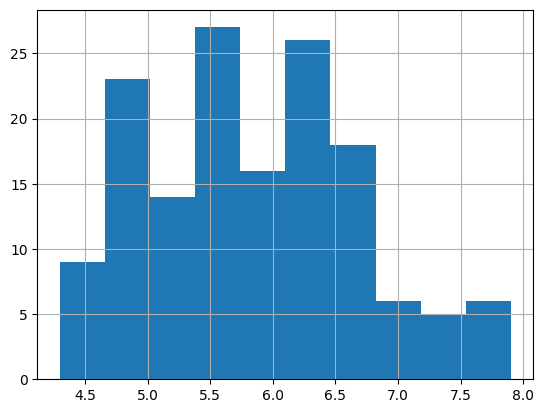

In [5]:
df['sepal_length'].hist()

<Axes: >

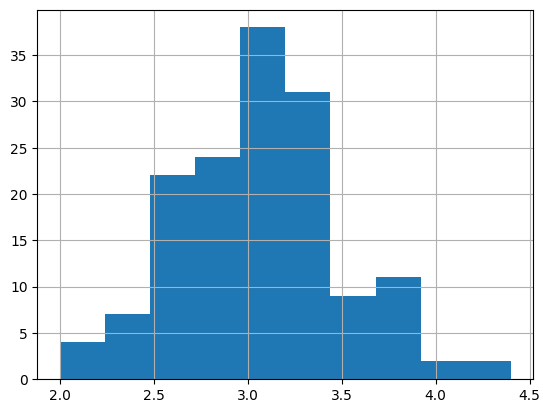

In [6]:
df['sepal_width'].hist()

<Axes: >

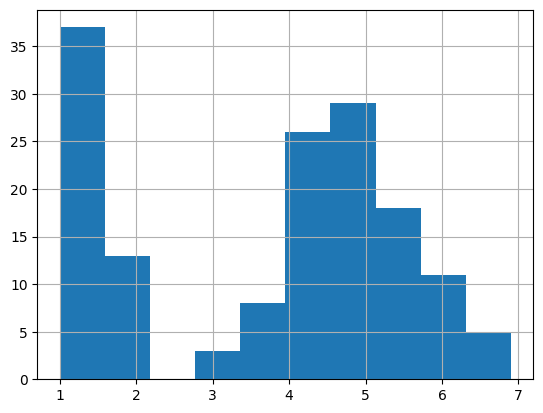

In [7]:
df['petal_length'].hist()

<Axes: >

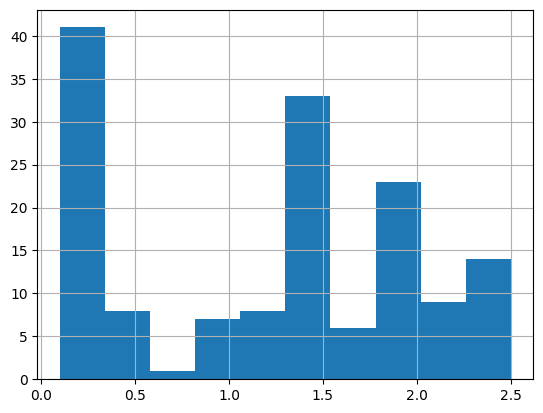

In [8]:
df['petal_width'].hist()

In [9]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

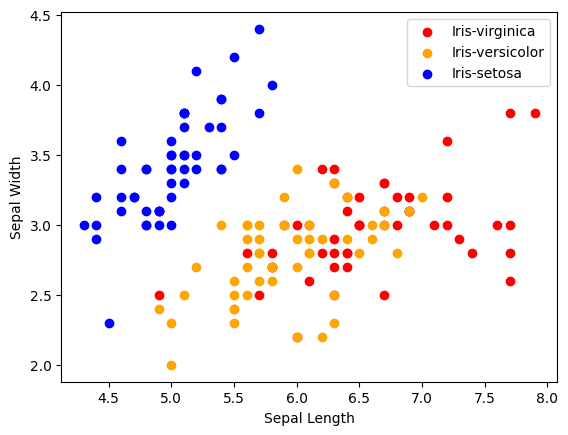

In [10]:
for i in range(3):
    x = df[df['species'] == species[i]]

    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

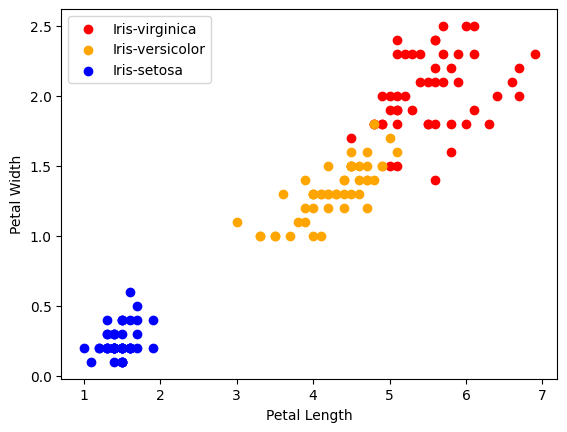

In [11]:
for i in range(3):
    x = df[df['species'] == species[i]]

    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

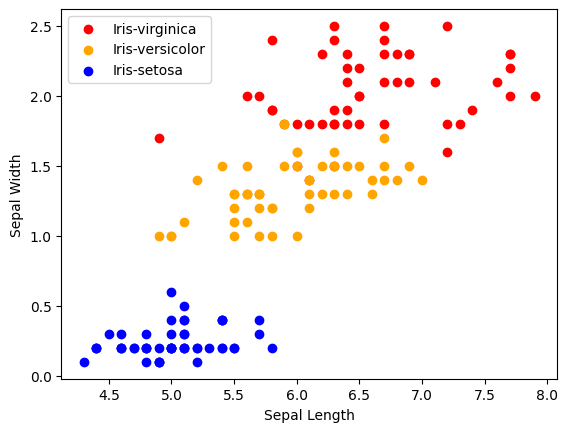

In [12]:
for i in range(3):
    x = df[df['species'] == species[i]]

    plt.scatter(x['sepal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

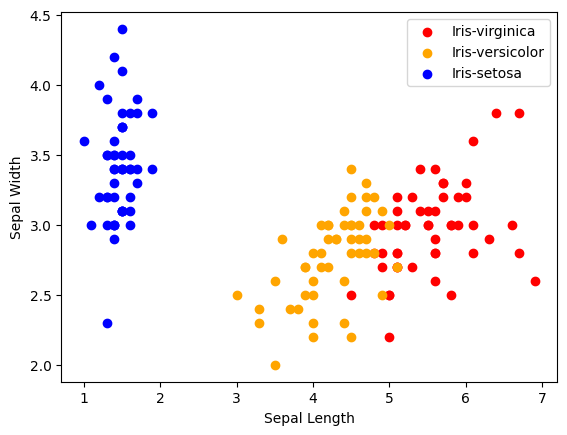

In [13]:
for i in range(3):
    x = df[df['species'] == species[i]]

    plt.scatter(x['petal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

<Axes: >

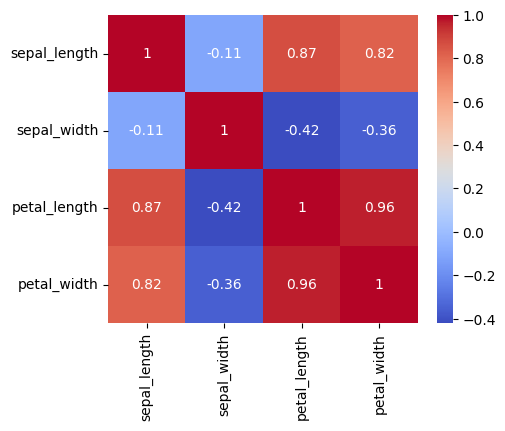

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)
print('Logistic Regression Accuracy:', model.score(x_test, y_test) * 100)

Logistic Regression Accuracy: 97.77777777777777


In [17]:
model.fit(x_train.values, y_train.values)
print('Logistic Regression Accuracy:', model.score(x_test, y_test) * 100)

Logistic Regression Accuracy: 97.77777777777777


In [18]:
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print('K-nearest neighbors Accuracy:', model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy: 97.77777777777777


In [23]:
filename = 'model.sav'
try:
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print('Model saved successfully...')
except Exception as e:
    print('Model not saved! Error:', e)

Model saved successfully...


In [24]:
load_model = pickle.load(open(filename, 'rb'))

In [25]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array(['Iris-versicolor'], dtype=object)